# Logistic Regression

Here we use Logistic Regression to solve the well known XOR problem.

In [1]:
import keras
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.layers import Dense
from keras import backend as K
from keras.callbacks import Callback, History 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle

2025-06-21 16:09:44.996885: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-21 16:09:45.006099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750518585.016328  113025 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750518585.019438  113025 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-21 16:09:45.031386: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
    "font.size": 14,
    "figure.dpi": 300})

## Generating a XOR data set

In [3]:
## Uncomment all the following lines to generate a new set of data points.
#Train1_x1 = (np.random.normal(loc=0.25, scale=0.05, size=500).reshape(1, -1)).T
#Train1_x2 = (np.random.normal(loc=0.25, scale=0.05, size=500).reshape(1, -1)).T

#Train2_x1 = (np.random.normal(loc=0.75, scale=0.05, size=500).reshape(1, -1)).T
#Train2_x2 = (np.random.normal(loc=0.25, scale=0.05, size=500).reshape(1, -1)).T

#Train3_x1 = (np.random.normal(loc=0.25, scale=0.05, size=500).reshape(1, -1)).T
#Train3_x2 = (np.random.normal(loc=0.75, scale=0.05, size=500).reshape(1, -1)).T

#Train4_x1 = (np.random.normal(loc=0.75, scale=0.05, size=500).reshape(1, -1)).T
#Train4_x2 = (np.random.normal(loc=0.75, scale=0.05, size=500).reshape(1, -1)).T

#y1 = np.zeros(500).reshape(1, -1).T
#y2 = np.ones(500).reshape(1, -1).T
#y3 = np.ones(500).reshape(1, -1).T
#y4 = np.zeros(500).reshape(1, -1).T

#Solving the XOR problem with logistic regression requires a term quadratic on the inputs, namely x1*x2 (hence the last column).
#Train1 = np.column_stack((Train1_x1, Train1_x2, Train1_x1 * Train1_x2))
#Train2 = np.column_stack((Train2_x1, Train2_x2, Train2_x1 * Train2_x2))
#Train3 = np.column_stack((Train3_x1, Train3_x2, Train3_x1 * Train3_x2))
#Train4 = np.column_stack((Train4_x1, Train4_x2, Train4_x1 * Train4_x2))

#X_train = np.row_stack((Train1, Train2, Train3, Train4))
#y_train = np.concatenate((y1, y2, y3, y4))

#X, y = shuffle(X_train, y_train, random_state=0)
#np.savetxt('InputData/LogReg-X_train.dat', X)
#np.savetxt('InputData/LogReg-y_train.dat', y)

X = np.loadtxt('InputData/XOR-X_train.dat')
y = np.loadtxt('InputData/XOR-y_train.dat')

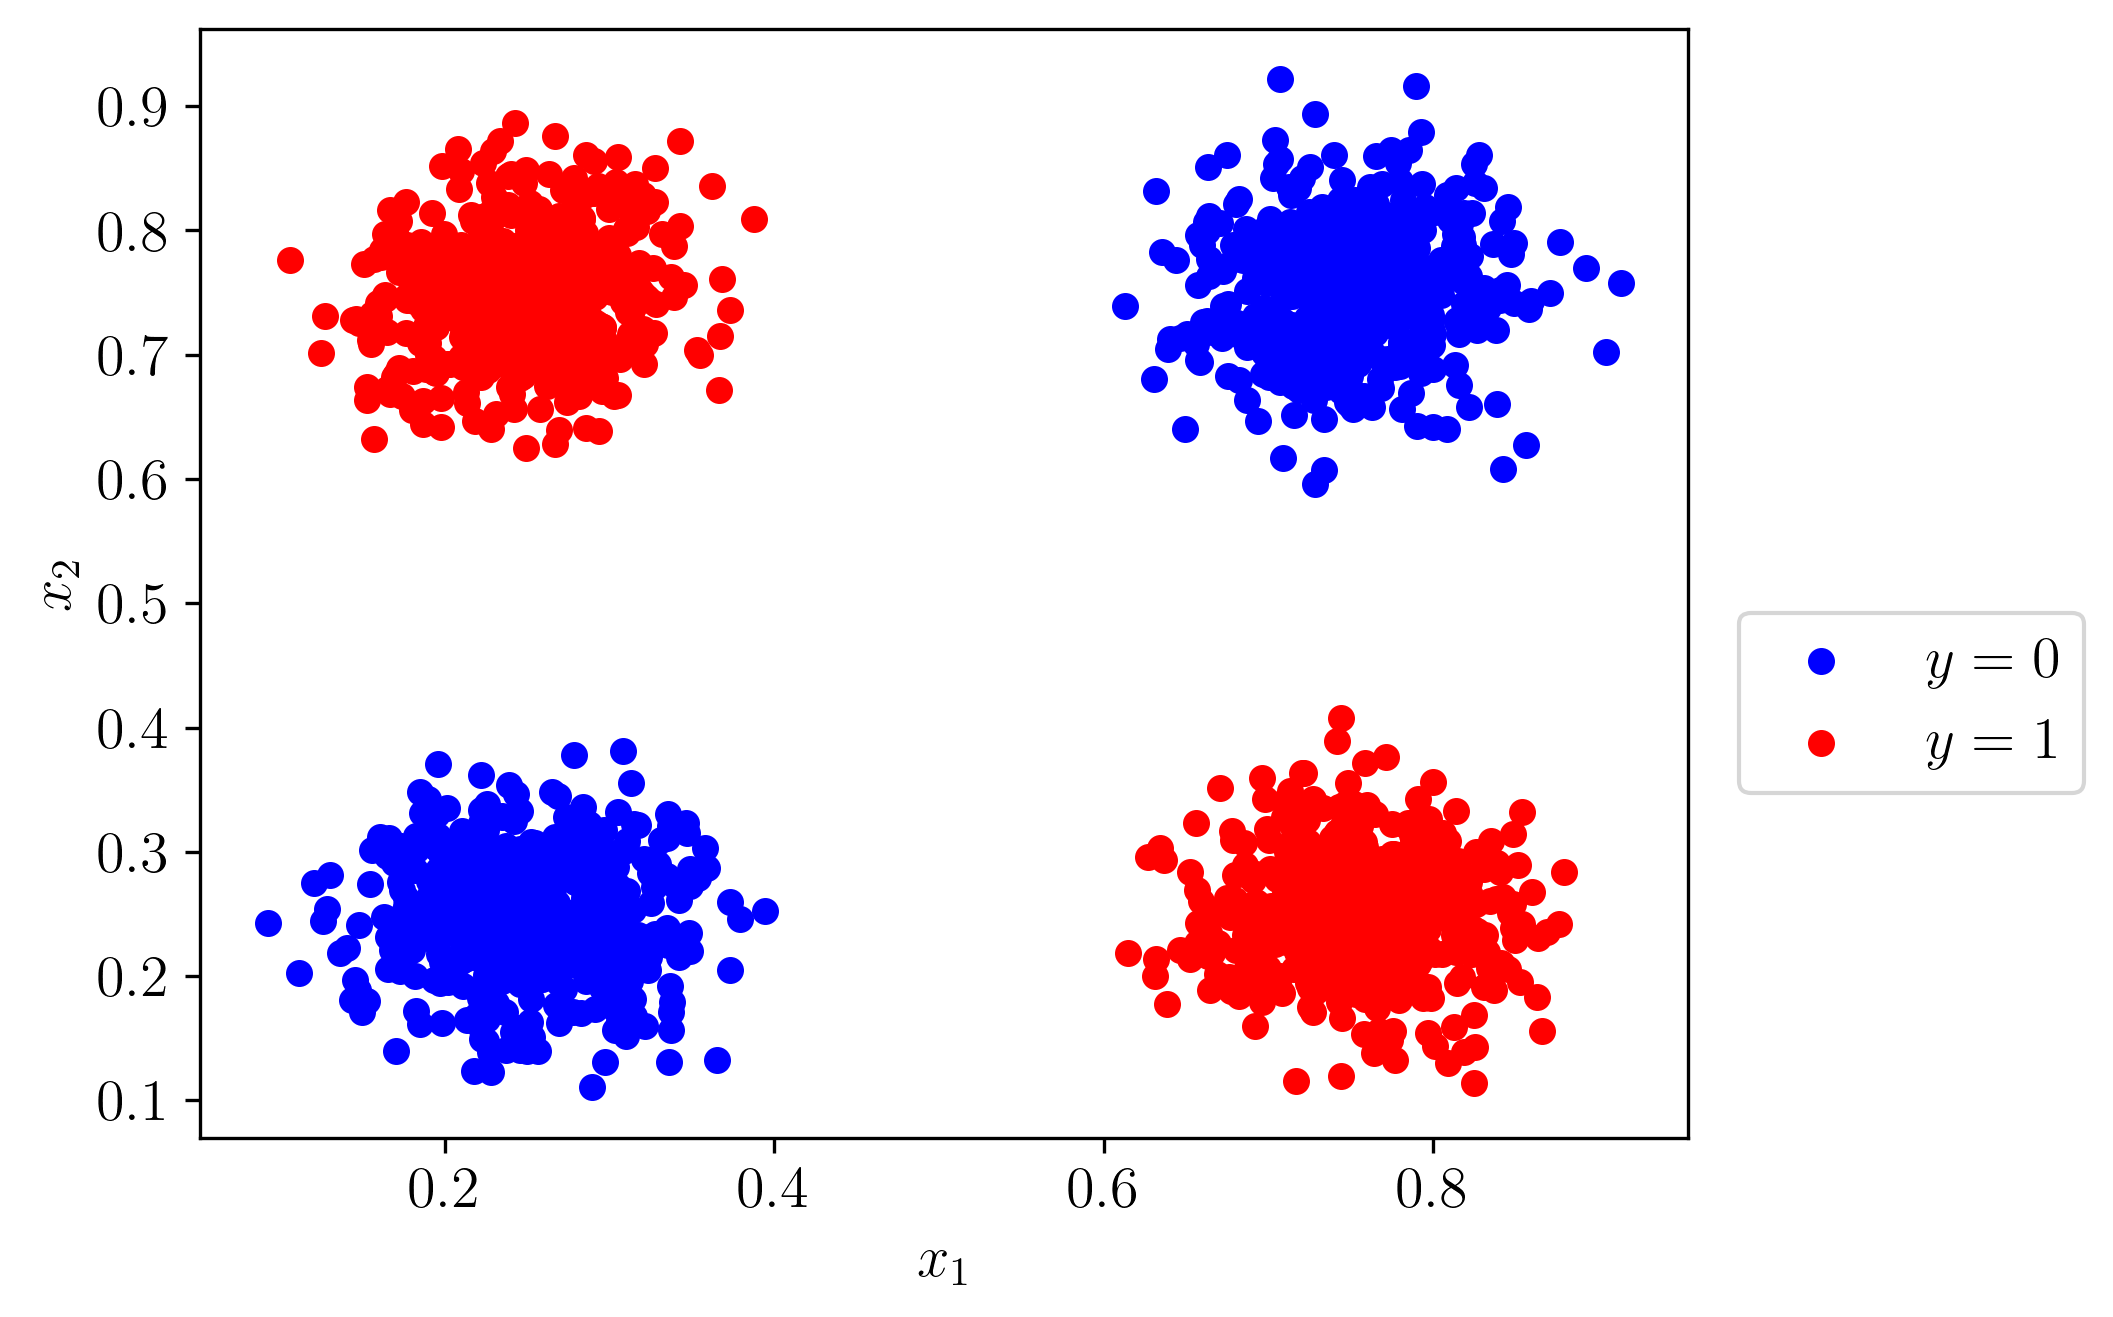

In [4]:
X0 = X[y == 0]
X1 = X[y == 1]

plt.scatter(x=X0[:,0], y=X0[:,1], s=30, marker="o", color='b')
plt.scatter(x=X1[:,0], y=X1[:,1], s=30, marker="o", color='r')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend([r'$y=0$', r'$y=1$'], loc='upper center', bbox_to_anchor=(1.15, 0.5))
plt.savefig('Plots/XOR_dataset.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

## Training logistic regression

In [5]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [6]:
num_classes = 1
num_features = 3
batch_size = 2000 #We use batch gradient descent (our data set has 2000 events).
epochs = 1000

In [7]:
def build_model(optimizer):
    """
    Builds a logistic regression model.

    Args:
        optimizer: Optimizer to train the model.

    Returns:
        model
    """
    model = Sequential()
    bce = tf.keras.losses.BinaryCrossentropy()
    model.add(Dense(num_classes, activation='sigmoid', input_dim=num_features, 
                    kernel_initializer=keras.initializers.Constant(value=0.0), 
                    kernel_regularizer=regularizers.L2(5e-4), 
                    bias_initializer=keras.initializers.Constant(value=0.0), 
                    bias_regularizer=regularizers.L2(5e-4)))
    model.compile(loss=bce, optimizer=optimizer, metrics=['accuracy'])
    return model

In [8]:
opt = keras.optimizers.SGD(learning_rate=5.0)

model = build_model(opt)
model.summary()

I0000 00:00:1750518586.917669  113025 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9556 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/joao/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
hist=model.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[LossHistory()])

Epoch 1/1000


I0000 00:00:1750518587.197216  113118 service.cc:148] XLA service 0x79bc18005800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750518587.197236  113118 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-06-21 16:09:47.207266: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.6885

I0000 00:00:1750518587.230352  113118 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1750518587.367974  113118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.6885
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7475 - loss: 0.6842
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4280 - loss: 0.6801
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7480 - loss: 0.6763
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6325 - loss: 0.6727
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7485 - loss: 0.6692
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6970 - loss: 0.6660
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7485 - loss: 0.6628
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7235 - loss: 0.6598
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7490 - loss: 0.6569
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7350 - loss: 0.6540
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7490 - lo

1/1 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.9770
Epoch 84/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.9780
Epoch 85/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.9795
Epoch 86/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.9805
Epoch 87/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.9820
Epoch 88/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.9835
Epoch 89/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.9845
Epoch 90/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.9860
Epoch 91/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.9875
Epoch 92/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.9885
Epoch 93/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 1.0000
Epoch 166/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 1.0000
Epoch 167/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 1.0000
Epoch 168/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 1.0000
Epoch 169/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 1.0000
Epoch 170/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 1.0000
Epoch 171/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 1.0000
Epoch 172/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 1.0000
Epoch 173/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 1.0000
Epoch 174/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 1.0000
Epoch 175/1000


1/1 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 1.0000
Epoch 248/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 1.0000
Epoch 249/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 1.0000
Epoch 250/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 1.0000
Epoch 251/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 1.0000
Epoch 252/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 1.0000
Epoch 253/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 1.0000
Epoch 254/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 1.0000
Epoch 255/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 1.0000
Epoch 256/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 1.0000
Epoch 257/1000


1/1 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 1.0000
Epoch 330/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 1.0000
Epoch 331/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 1.0000
Epoch 332/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 1.0000
Epoch 333/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 1.0000
Epoch 334/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 1.0000
Epoch 335/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 1.0000
Epoch 336/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 1.0000
Epoch 337/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 1.0000
Epoch 338/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 1.0000
Epoch 339/1000


1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 412/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 413/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 414/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 415/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 416/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 417/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 418/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 419/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 420/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 1.0000
Epoch 421/1000


1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 494/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 495/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 496/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 497/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 498/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 499/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 500/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 501/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 502/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 503/1000


1/1 [==============================] - 0s 3ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 576/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 577/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 578/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 579/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 580/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 581/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 582/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 583/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 584/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 585/1000


1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 658/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 659/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 660/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 661/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 662/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 663/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 664/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 665/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 666/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 667/1000


1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 740/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 741/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 742/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 743/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 744/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 745/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 746/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 747/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 748/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 749/1000


1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 822/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 823/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 824/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 825/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 826/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 827/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 828/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 829/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 830/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 831/1000


1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 904/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 905/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 906/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 907/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 908/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 909/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 910/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 911/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 912/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 913/1000


1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 986/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 987/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 988/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 989/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 990/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 991/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 992/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 993/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 994/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 995/1000


In [10]:
##This is only done for the best learning rate, eta=5.
#model.save_weights("OutputData/LogReg-weights.weights.h5")

## Evolution of loss as a function of the learning rate

In [11]:
## Uncomment to save the evolution of the loss for a different run
#np.savetxt('OutputData/LogReg-Loss_lr5.dat', hist.history['loss'])

In [12]:
lr02 = np.loadtxt('OutputData/LogReg-Loss_lr02.dat')
lr1 = np.loadtxt('OutputData/LogReg-Loss_lr1.dat')
lr5 = np.loadtxt('OutputData/LogReg-Loss_lr5.dat')
lr7 = np.loadtxt('OutputData/LogReg-Loss_lr7.dat')

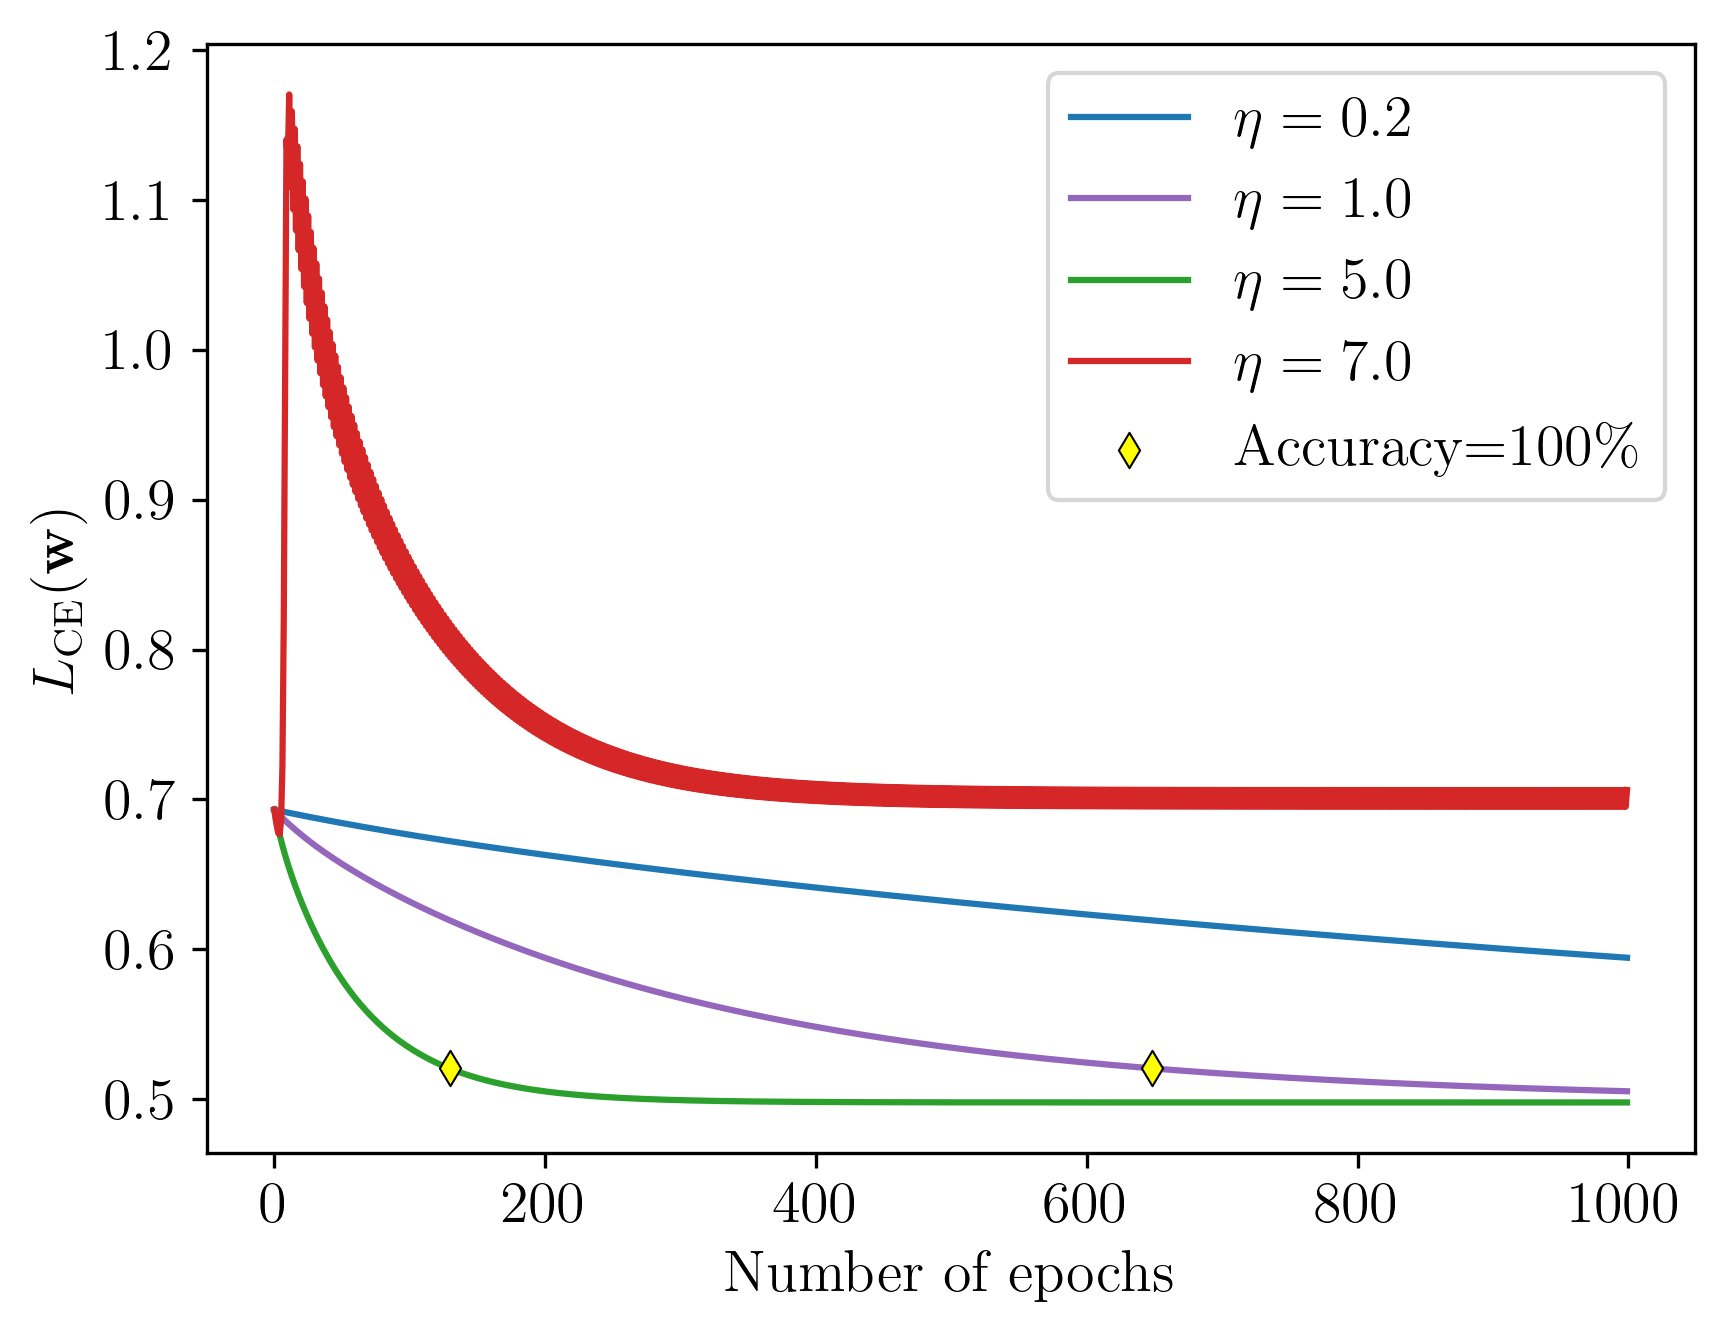

In [13]:
plt.plot(np.arange(0,1000,1), lr02, color='C0')
plt.plot(np.arange(0,1000,1), lr1, color='C4')
plt.plot(np.arange(0,1000,1), lr5, color='C2')
plt.plot(np.arange(0,1000,1), lr7, color='C3')

#Points where accuracy reaches 100%.
plt.scatter([648], [lr1[647]], color='yellow', marker='d', edgecolor='black', linewidth=0.5, zorder=3) #Coordinates seen directly from the output of model.fit
plt.scatter([130], [lr5[129]], color='yellow', marker='d', edgecolor='black', linewidth=0.5, zorder=4) #Coordinates seen directly from the output of model.fit

plt.legend([r'$\eta=0.2$', r'$\eta=1.0$', r'$\eta=5.0$', r'$\eta=7.0$', r'Accuracy=100$\%$'])
plt.xlabel(r'Number of epochs')
plt.ylabel(r'$L_{\rm CE}(\mathbf{w})$')
plt.savefig('Plots/LogReg-LearningRates.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

## Unveiling the decision boundary

In [14]:
model.load_weights("OutputData/LogReg-weights.weights.h5")

In [15]:
b = model.get_weights()[1][0]
w1 = model.get_weights()[0][0][0]
w2 = model.get_weights()[0][1][0]
w3 = model.get_weights()[0][2][0]

In [16]:
print(b, w1, w2, w3)

-2.6272373 5.7806416 5.790284 -12.592792


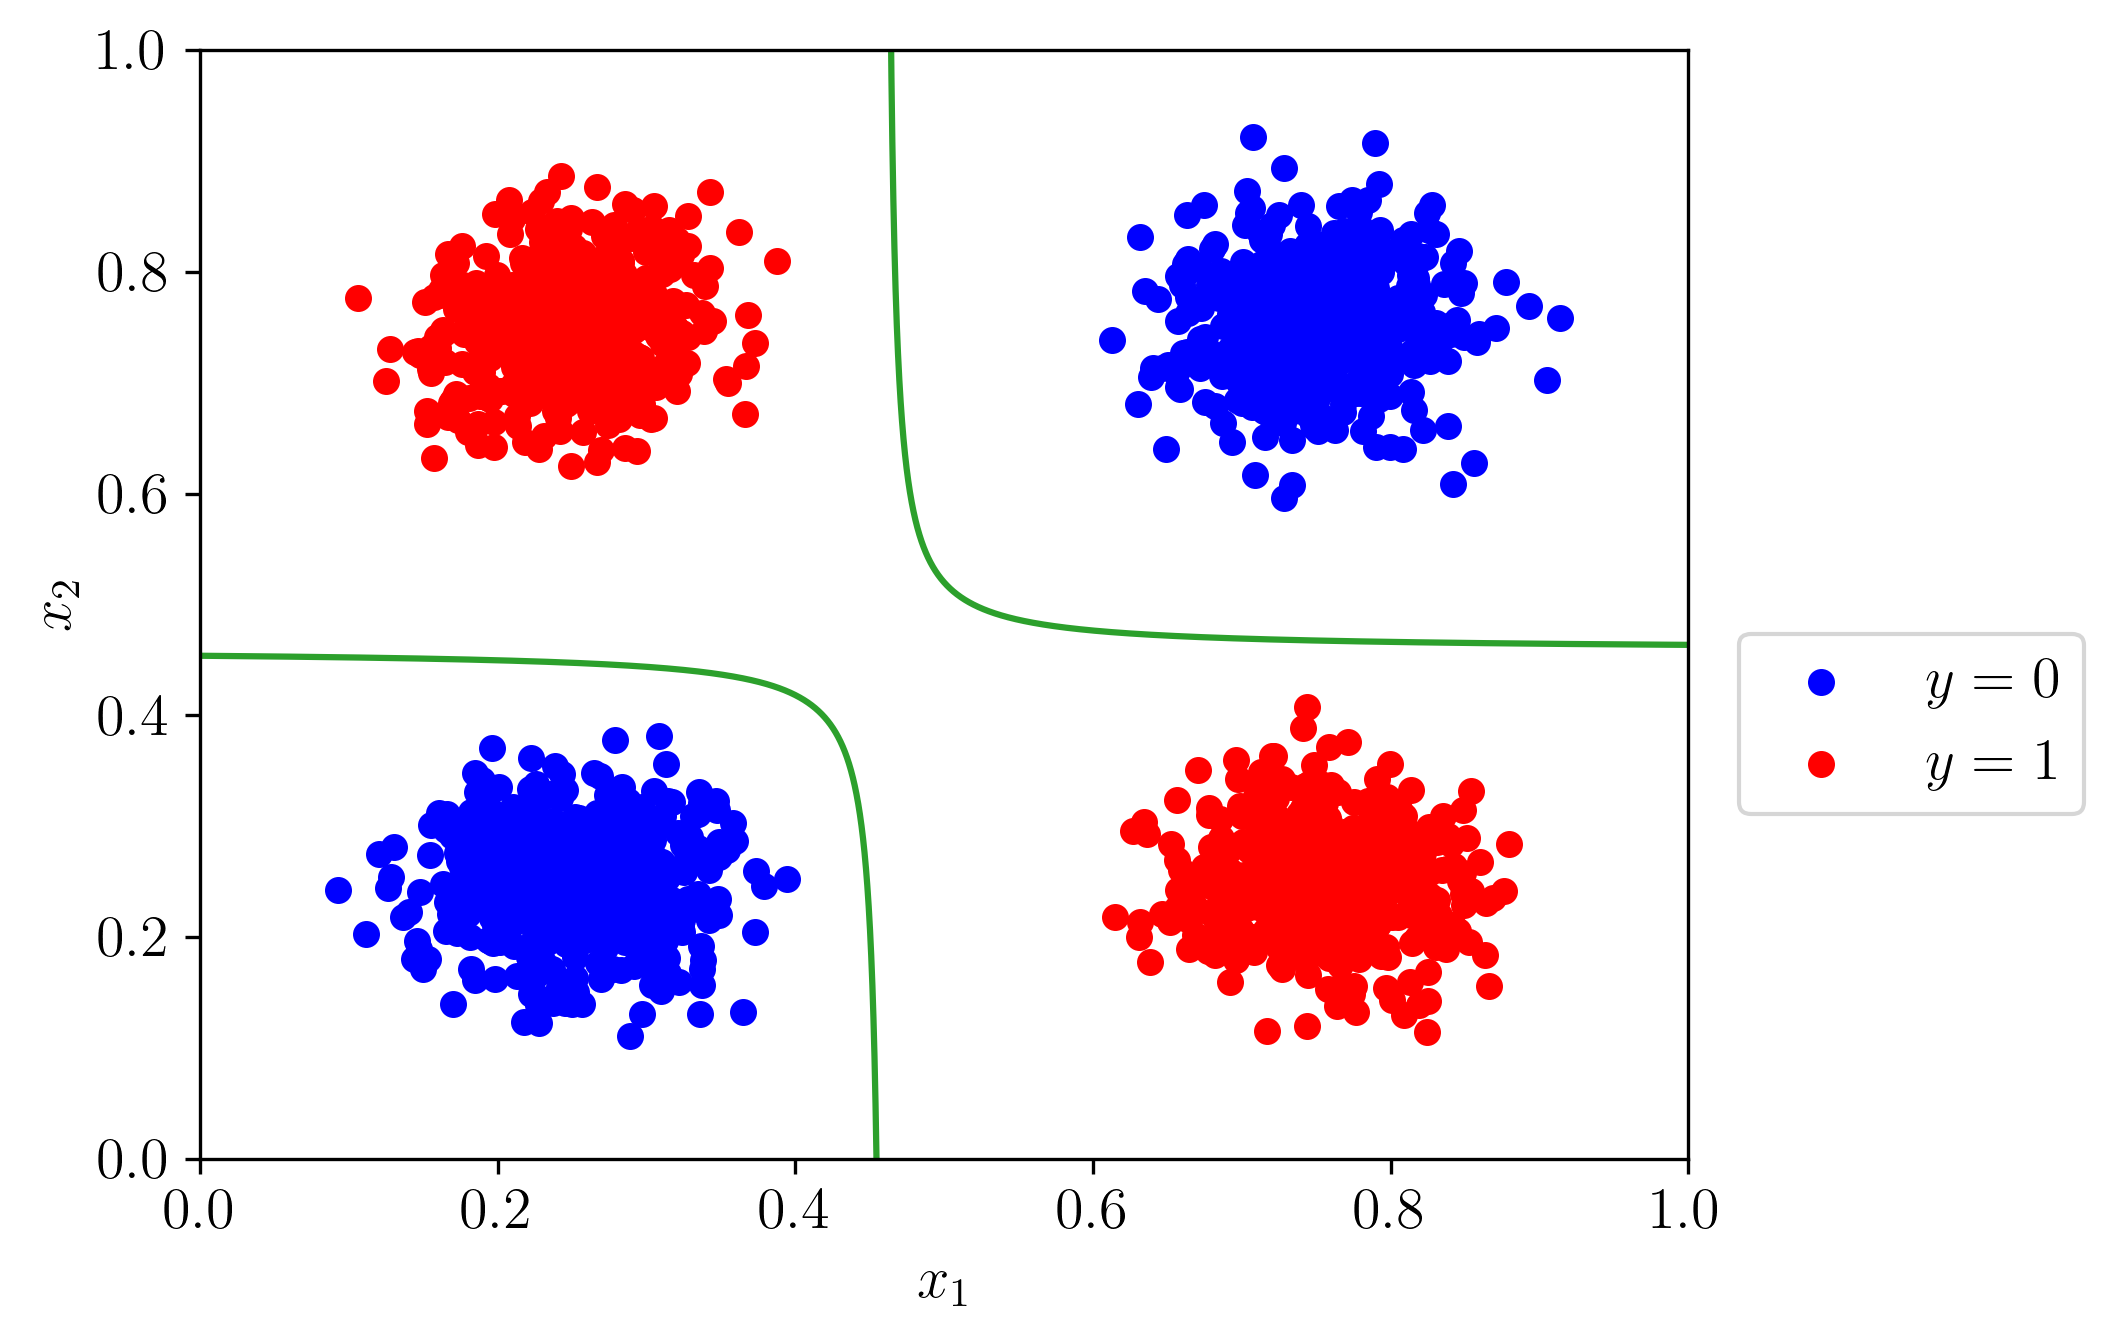

In [17]:
xx = np.linspace(0, 1, 10000)      
utol = 10.
ltol = -10.
yy = - (b + xx * w1) / (w2 + xx * w3)
yy[yy>utol] = np.inf
yy[yy<ltol] = -np.inf

X0 = X[y == 0]
X1 = X[y == 1]

plt.scatter(x=X0[:,0], y=X0[:,1], s=30, marker="o", color='b')
plt.scatter(x=X1[:,0], y=X1[:,1], s=30, marker="o", color='r')
plt.plot(xx, yy, color='C2') #Decision boundary
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim((0,1))
plt.ylim((0,1))
plt.legend([r'$y=0$', r'$y=1$'], loc='upper center', bbox_to_anchor=(1.15, 0.5))
plt.savefig('Plots/LogReg-XOR_fit.png', bbox_inches='tight', pad_inches=0.01)
plt.show()